Accuracy: 0.933

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


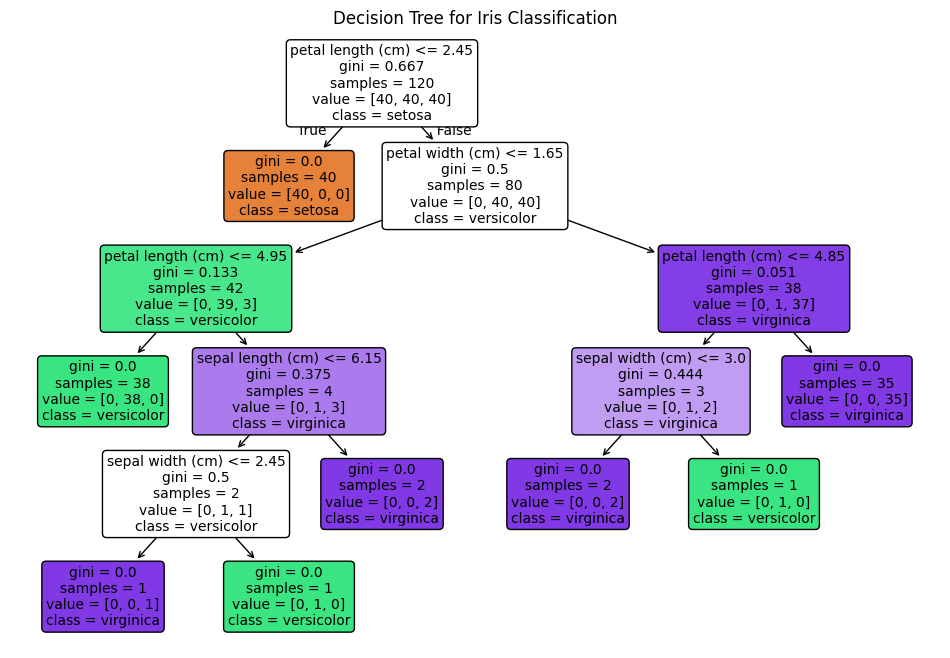


Feature importances:
petal length (cm)    0.558568
petal width (cm)     0.406015
sepal width (cm)     0.029167
sepal length (cm)    0.006250
dtype: float64


In [1]:
# decision_tree_demo.py
# ---------------------
# Build, evaluate, and visualize a Decision Tree classifier
# ---------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris          # swap this out for your own data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load data ─────────────────────────────────────────────
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")      # 0=setosa, 1=versicolor, 2=virginica

# If using a CSV:
# data = pd.read_csv("your_data.csv")
# X = data.drop("target", axis=1)
# y = data["target"]

# 2. Train / test split ───────────────────────────────────
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# 3. Fit Decision Tree ────────────────────────────────────
dt = DecisionTreeClassifier(
    criterion="gini",      # or "entropy" for information gain
    max_depth=None,        # try values like 3-5 to prevent overfitting
    random_state=42
)
dt.fit(X_train, y_train)

# 4. Evaluate ─────────────────────────────────────────────
y_pred = dt.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}\n")
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

# 5. Visualize tree ───────────────────────────────────────
plt.figure(figsize=(12, 8))
plot_tree(
    dt,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10,
)
plt.title("Decision Tree for Iris Classification")
plt.show()

# 6. Optional: feature importance ─────────────────────────
importances = pd.Series(dt.feature_importances_, index=iris.feature_names)
print("\nFeature importances:")
print(importances.sort_values(ascending=False))